In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from spectralcluster import SpectralClusterer

In [2]:
def load_files(folder_name):
    files = librosa.util.find_files(folder_name)
    # print(files)
    laugh_audios = []
    for audio_name in files:
        y, sr = librosa.core.load(audio_name)
        laugh_audios.append(y)
    return laugh_audios

In [3]:
def K_means(data_array, K):
    kmeans = KMeans(n_clusters = K).fit(data_array)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    clusters = [[] for i in range(K)] # Empty array to store the clusters.
    count = 1  # Count the index
    for ele in labels:
        clusters[ele].append(count)
        count += 1
    for c in clusters:
        c = [i+1 for i in c]
    for i in range(K):
        print("Cluster", i ,":", clusters[i])
    return labels

In [4]:
def spec_cluster(data_array):
    spec = SpectralClusterer(min_clusters=2, max_clusters=5, 
                             p_percentile=0.95, gaussian_blur_sigma=1)
    labels = spec.predict(data_array)
    K = max(labels)+1
    clusters = [[] for i in range(K)] # Empty array to store the clusters.
    count = 0  # Count the index
    for ele in labels:
        clusters[ele].append(count)
        count += 1
    for c in clusters:
        c = [i+1 for i in c]
    for i in range(K):
        print("Cluster", i ,":", clusters[i])
    return labels

In [5]:
# MFCC
def energy_weighted_mfcc(y):
    S, phase = librosa.magphase(librosa.stft(y))
    rms = librosa.feature.rmse(S=S)
    mfcc = librosa.feature.mfcc(y, n_mfcc=13)[1:]
    return np.array([np.sum(mfcc*rms, axis=1)/np.sum(rms)])

In [6]:
# Energy (RMS)
def get_file_rms(y):
    return [np.sqrt(np.dot(y, y))/len(y)]

In [7]:
def get_feature_row(y):
    mfcc_feat = energy_weighted_mfcc(y)
    energy = float(get_file_rms(y)[0])
    duration = float(librosa.get_duration(y))
    centroid = float(np.mean(librosa.feature.spectral_centroid(y)))
    print([duration, energy])
    return np.hstack((mfcc_feat, np.array([[energy, duration, centroid]])))

In [8]:
# Dirrectly use to get the standard feature matrix.
def get_feature(folder_name):
    files = load_files(folder_name) # load to time series
    f_matrix = get_feature_row(files[0])
    for i in files[1:]:
        next_row = get_feature_row(i)
        f_matrix = np.vstack((f_matrix,next_row))
        standard_f = preprocessing.StandardScaler().fit_transform(f_matrix)
    return standard_f

In [9]:
def standard_matrix(matrix):
    return StandardScaler().fit_transform(matrix)

In [10]:
JE = get_feature("JE_files")

[0.7900226757369615, 0.0004713032193627341]
[2.9149659863945576, 0.0004624878131476231]
[1.34, 0.0002865134009484789]
[1.72, 0.0005043017011160766]
[1.7100226757369614, 0.00033099390951662566]
[1.4500226757369614, 0.00014984935426072237]
[1.5299773242630386, 0.0003179269349204722]
[3.76, 0.0003630917456604761]
[9.150975056689342, 0.00031355870416434876]
[1.6116099773242631, 0.0010587201897811374]
[1.6500226757369614, 0.0005537186736301445]
[4.050022675736962, 0.0004039027248426267]
[1.0100226757369615, 0.00043737222999434697]
[0.92, 0.0004650339929354469]
[0.74, 0.00019417807351156962]


In [11]:
# Functions to minmax the columes. Scaled by featrue_range.
d_e = np.array([[0.7900226757369615, 0.0004713032193627341],
[2.9149659863945576, 0.0004624878131476231],
[1.34, 0.0002865134009484789],
[1.72, 0.0005043017011160766],
[1.7100226757369614, 0.00033099390951662566],
[1.4500226757369614, 0.00014984935426072237],
[1.5299773242630386, 0.0003179269349204722],
[3.76, 0.0003630917456604761],
[9.150975056689342, 0.00031355870416434876],
[1.6116099773242631, 0.0010587201897811374],
[1.6500226757369614, 0.0005537186736301445],
[4.050022675736962, 0.0004039027248426267],
[1.0100226757369615, 0.00043737222999434697],
[0.92, 0.0004650339929354469],
[0.74, 0.00019417807351156962]])
d_e_scale = preprocessing.minmax_scale(d_e, feature_range=(1,8),axis = 0)
print(d_e_scale)

[[1.04163117 3.4757941 ]
 [2.81010665 3.40789904]
 [1.49934758 2.05256797]
 [1.81560104 3.72994394]
 [1.80729745 2.39515081]
 [1.5909135  1.        ]
 [1.65745544 2.29451075]
 [3.5133828  2.642364  ]
 [8.         2.26086723]
 [1.72539388 8.        ]
 [1.75736269 4.11054676]
 [3.754753   2.95668463]
 [1.22472528 3.21446222]
 [1.14980427 3.42750937]
 [1.         1.34141379]]


In [23]:
K_means(JE,3)

Cluster 0 : [2, 8, 10]
Cluster 1 : [1, 3, 5, 6, 7, 9, 13, 14]
Cluster 2 : [4, 11, 12, 15]


array([1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2], dtype=int32)

In [11]:
mf_matrix = get_feature('Male_Female')
print(mf_matrix)

[[-0.51197592 -0.35794944 -1.03960751  0.31082158 -0.80866521  0.46511296
   0.22796572 -1.74072716  0.49851402  0.65596528  0.9450439  -0.33919076
   0.33171777  0.09741075  1.44383669]
 [ 1.64384574 -0.36679508 -0.34189848 -0.89667528  0.55265135  0.96081082
   0.72546288 -2.02579669  0.65289313  1.27869945 -0.14605477  0.23280378
   0.10037592  0.09899437 -0.27065433]
 [ 0.68637559  0.6478782   0.94338063  2.20426637  0.01953226 -0.36532742
  -0.76291998 -0.39373123  0.25731245 -0.08293668 -0.38835788  1.14436056
   0.75740441 -0.78233019 -1.18189014]
 [ 1.34926502  0.78429582 -0.5621155  -0.41513195  0.30702625  0.98021793
   0.43170833 -0.15508173  0.64621654  1.24704507  0.10156433 -0.38382299
  -1.05304843 -1.09822551 -1.08508798]
 [-0.01510233  0.26643936  0.30202136  0.86939098 -0.09216828 -1.05066126
   0.58863912 -0.14178655 -0.21615276  0.73877529 -1.02420808 -0.06599828
   1.07471995 -0.3832569  -0.22342964]
 [ 1.25463117  0.31410766 -0.09461436 -1.82993718  0.95933462  0.

In [13]:
mf_embedded = TSNE(n_components=2).fit_transform(mf_matrix)
print(mf_embedded)

[[ -27.860128   126.36817  ]
 [ 134.39732    -14.399454 ]
 [  13.016602  -129.65015  ]
 [ -81.985435    20.019423 ]
 [-133.63948     59.27483  ]
 [ -55.20078    -23.743402 ]
 [  76.46201      2.2101235]
 [ -95.39254    -87.88198  ]
 [ -16.0549      55.149654 ]
 [  47.534237    48.532433 ]
 [   5.0523047    2.6288965]
 [  76.157005  -132.17966  ]
 [ -71.42477     82.273346 ]
 [  52.94549    107.03095  ]
 [ -37.56651   -103.97993  ]
 [ -10.655553   -54.554092 ]
 [  42.379475   -50.05423  ]
 [-150.51453     -8.235508 ]
 [  98.09328    -74.74407  ]]


In [22]:
def TSNE_plot(folder_name):
    f_matrix = get_feature(folder_name)
    color = ['blue' if l == 0 else 'red' for l in K_means(f_matrix, 2)]
    embedded = TSNE(n_components=2).fit_transform(f_matrix)
    plt.scatter(embedded[:,0],embedded[:,1],color = color)

Cluster 0 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
Cluster 1 : [0, 11, 12, 13, 14, 15, 16, 17]


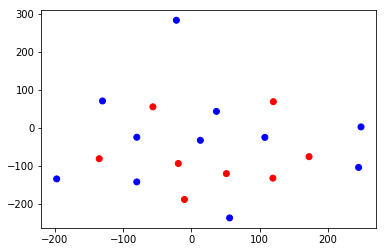

In [24]:
TSNE_plot("Male_Female")

How to use this function:

In [16]:
new_mf = get_feature('Male_Female')

In [17]:
K_means(new_mf, 2)

Cluster 0 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
Cluster 1 : [0, 11, 12, 13, 14, 15, 16, 17]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
      dtype=int32)

In [18]:
MI28 = get_feature("MI28")
K_means(MI28,3)

Cluster 0 : [1, 3, 9, 13, 16, 17, 27, 28]
Cluster 1 : [7, 8, 11, 15, 18, 20, 22, 23, 24, 26, 29, 31]
Cluster 2 : [0, 2, 4, 5, 6, 10, 12, 14, 19, 21, 25, 30]


array([2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 0, 0, 1, 2, 1], dtype=int32)

In [19]:
#EMO into 2
K_means(get_feature("EMO"), 2)

Cluster 0 : [3, 4, 6, 7, 8, 9]
Cluster 1 : [0, 1, 2, 5]


array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [20]:
#EMO into 3
K_means(get_feature("EMO"), 3)

Cluster 0 : [1]
Cluster 1 : [3, 4, 6, 7, 8, 9]
Cluster 2 : [0, 2, 5]


array([2, 0, 2, 1, 1, 2, 1, 1, 1, 1], dtype=int32)

In [21]:
#EMO into 4
K_means(get_feature("EMO"), 4)

Cluster 0 : [0, 3, 4, 6, 7, 8]
Cluster 1 : [2, 5]
Cluster 2 : [1]
Cluster 3 : [9]


array([0, 2, 1, 0, 0, 1, 0, 0, 0, 3], dtype=int32)

In [22]:
#JE Mixed groups into two
K_means(get_feature("JE"), 2)

Cluster 0 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17]
Cluster 1 : [0, 11, 12, 13, 14, 15, 16, 18]


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int32)

In [23]:
K_means(get_feature("EMO_full"),5)

Cluster 0 : [8, 10, 24, 31, 43, 56]
Cluster 1 : [0, 3, 5, 6, 7, 9, 11, 12, 15, 16, 17, 19, 21, 22, 23, 36, 37, 38, 39, 40, 42, 44, 47, 48, 50, 54]
Cluster 2 : [28, 32, 55]
Cluster 3 : [1, 4, 14, 18, 25, 30, 33, 45, 49]
Cluster 4 : [2, 13, 20, 26, 27, 29, 34, 35, 41, 46, 51, 52, 53]


array([1, 3, 4, 1, 3, 1, 1, 1, 0, 1, 0, 1, 1, 4, 3, 1, 1, 1, 3, 1, 4, 1,
       1, 1, 0, 3, 4, 4, 2, 4, 3, 0, 2, 3, 4, 4, 1, 1, 1, 1, 1, 4, 1, 0,
       1, 3, 4, 1, 1, 3, 1, 4, 4, 4, 1, 2, 0], dtype=int32)

In [24]:
K_means(get_feature("EMO_full"),7)

Cluster 0 : [0, 3, 9, 11, 12, 16, 19, 21, 22, 23, 36, 37, 39, 40, 42, 44, 47, 50, 54]
Cluster 1 : [28, 32, 55]
Cluster 2 : [6, 17, 27, 34, 38, 46, 48]
Cluster 3 : [1, 2, 4, 5, 7, 13, 15, 18, 20, 25, 26, 29, 30, 33, 35, 41, 45, 49, 51, 53]
Cluster 4 : [8, 10, 24, 31, 43, 56]
Cluster 5 : [14]
Cluster 6 : [52]


array([0, 3, 3, 0, 3, 3, 2, 3, 4, 0, 4, 0, 0, 3, 5, 3, 0, 2, 3, 0, 3, 0,
       0, 0, 4, 3, 3, 2, 1, 3, 3, 4, 1, 3, 2, 3, 0, 0, 2, 0, 0, 3, 0, 4,
       0, 3, 2, 0, 2, 3, 0, 3, 6, 3, 0, 1, 4], dtype=int32)

In [26]:
K_means(new_mf, 3)

Cluster 0 : [7, 11, 12, 16, 17]
Cluster 1 : [2, 4, 5, 6, 8, 9, 10, 18]
Cluster 2 : [0, 1, 3, 13, 14, 15]


array([2, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 1],
      dtype=int32)

In [27]:
K_means(new_mf, 2)

Cluster 0 : [0, 11, 12, 13, 14, 15, 16, 17]
Cluster 1 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]


array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int32)

In [30]:
K_means(get_feature("test_spec"), 4)

Cluster 0 : [4]
Cluster 1 : [0, 1, 2, 3]
Cluster 2 : [5]
Cluster 3 : [6]


array([1, 1, 1, 1, 0, 2, 3], dtype=int32)

In [31]:
K_means(get_feature("test_spec"), 5)

Cluster 0 : [1, 2, 3]
Cluster 1 : [6]
Cluster 2 : [4]
Cluster 3 : [5]
Cluster 4 : [0]


array([4, 0, 0, 0, 2, 3, 1], dtype=int32)

In [41]:
spec.predict(new_mf)

array([2, 2, 0, 0, 0, 3, 3, 7, 7, 7, 3, 6, 1, 5, 5, 5, 1, 1, 4],
      dtype=int32)

In [43]:
spec.predict(get_feature("EMO_full"))

1

In [48]:
spec_cluster(get_feature("EMO_full"))

Cluster 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 24, 43, 44]
Cluster 1 : [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [49]:
spec_cluster(get_feature("JO_full"))

Cluster 0 : [2, 3, 4, 16, 17, 49, 53]
Cluster 1 : [10, 11, 12, 24, 25, 26, 27, 28, 38, 47, 48]
Cluster 2 : [0, 1, 5, 6, 50, 51, 52]
Cluster 3 : [41, 42, 43, 44, 45, 46]
Cluster 4 : [29, 30, 31, 32]
Cluster 5 : [7, 8, 9, 21, 22, 23]
Cluster 6 : [13, 18, 19, 20]
Cluster 7 : [14, 15, 33, 34, 35, 36, 37, 39, 40]


array([2, 2, 0, 0, 0, 2, 2, 5, 5, 5, 1, 1, 1, 6, 7, 7, 0, 0, 6, 6, 6, 5,
       5, 5, 1, 1, 1, 1, 1, 4, 4, 4, 4, 7, 7, 7, 7, 7, 1, 7, 7, 3, 3, 3,
       3, 3, 3, 1, 1, 0, 2, 2, 2, 0], dtype=int32)

In [52]:
spec_cluster(get_feature("JO_full"))

Cluster 0 : [42, 43, 44, 45, 46, 47]
Cluster 1 : [1, 2, 8, 20, 21, 22, 23, 24, 51, 52, 53]
Cluster 2 : [0, 3, 4, 5, 6, 7, 16, 17, 18, 48, 49, 50]
Cluster 3 : [9, 10, 11, 12, 13, 25, 26, 27, 28, 29, 30, 31, 32, 33, 39]
Cluster 4 : [14, 15, 19, 34, 35, 36, 37, 38, 40, 41]


array([2, 1, 1, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 4, 4, 2, 2, 2, 4, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 1, 1, 1], dtype=int32)

In [12]:
K_means(get_feature("EMO_full"), 4)

Cluster 0 : [4, 5, 8, 9, 10, 11, 12, 15, 16, 17, 19, 21, 22, 23, 27, 34, 36, 37, 38, 39, 40, 42, 44, 46, 47, 48, 50, 54]
Cluster 1 : [0, 24, 28, 31, 32, 43, 55]
Cluster 2 : [1, 2, 3, 6, 7, 14, 18, 25, 30, 33, 45, 49]
Cluster 3 : [13, 20, 26, 29, 35, 41, 51, 52, 53]


array([1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 0,
       0, 0, 1, 2, 3, 0, 1, 3, 2, 1, 1, 2, 0, 3, 0, 0, 0, 0, 0, 3, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 3, 3, 3, 0, 1], dtype=int32)

In [13]:
K_means(get_feature("MAL_full"), 3)

Cluster 0 : [0, 5]
Cluster 1 : [2, 3, 7]
Cluster 2 : [1, 4, 6, 8, 9]


array([0, 2, 1, 1, 2, 0, 2, 1, 2, 2], dtype=int32)

In [14]:
K_means(get_feature("MAL_full"), 3)

Cluster 0 : [3, 4, 8]
Cluster 1 : [0, 2, 5, 7, 9]
Cluster 2 : [1, 6]


array([1, 2, 1, 0, 0, 1, 2, 1, 0, 1], dtype=int32)

In [15]:
K_means(get_feature("MAL_full"), 4)

Cluster 0 : [3, 4, 8]
Cluster 1 : [2, 5, 7, 9]
Cluster 2 : [1, 6]
Cluster 3 : [0]


array([3, 2, 1, 0, 0, 1, 2, 1, 0, 1], dtype=int32)

In [17]:
K_means(get_feature("CA_full"), 4)

Cluster 0 : [2, 4, 5, 7, 8, 9, 11, 12, 15, 16, 17, 19, 22, 24, 25, 27, 30, 31, 40, 48, 55, 56, 57]
Cluster 1 : [6, 20, 21, 26, 35, 49, 50]
Cluster 2 : [14, 32, 36, 37, 39, 41, 44, 47, 52, 59]
Cluster 3 : [0, 1, 3, 10, 13, 18, 23, 28, 29, 33, 34, 38, 42, 43, 45, 46, 51, 53, 54, 58]


array([3, 3, 0, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 3, 0, 1, 1,
       0, 3, 0, 0, 1, 0, 3, 3, 0, 0, 2, 3, 3, 1, 2, 2, 3, 2, 0, 2, 3, 3,
       2, 3, 3, 2, 0, 1, 1, 3, 2, 3, 3, 0, 0, 0, 3, 2], dtype=int32)

In [21]:
K_means(get_feature("YO_full"), 3)

Cluster 0 : [1, 5, 6, 7, 9, 11, 12, 13, 21, 22, 27, 29, 30, 32, 34, 36, 39, 41, 45, 48]
Cluster 1 : [0, 2, 4, 8, 15, 17, 18, 19, 20, 33, 35, 37, 38, 40, 44]
Cluster 2 : [3, 10, 14, 16, 23, 24, 25, 26, 28, 31, 42, 43, 46, 47]


array([1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2,
       1, 0, 2, 2, 0], dtype=int32)

In [22]:
K_means(get_feature("YO_full"), 2)

Cluster 0 : [1, 3, 4, 8, 10, 14, 15, 16, 17, 19, 20, 23, 24, 25, 26, 28, 31, 33, 35, 37, 40, 42, 43, 44, 46, 47]
Cluster 1 : [0, 2, 5, 6, 7, 9, 11, 12, 13, 18, 21, 22, 27, 29, 30, 32, 34, 36, 38, 39, 41, 45, 48]


array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1], dtype=int32)

Cluster 0 : [3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50]
Cluster 1 : [0, 1, 2, 4, 5, 6, 17, 18, 22, 24, 49, 51, 52]


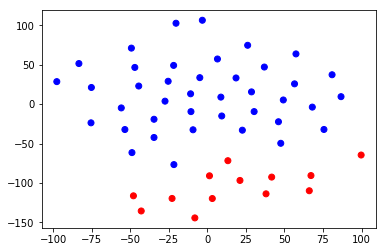

In [25]:
TSNE_plot("JO_full")

Cluster 0 : [0, 2, 5, 6, 7, 9, 11, 12, 13, 18, 21, 22, 27, 29, 30, 32, 34, 36, 38, 39, 41, 45, 48]
Cluster 1 : [1, 3, 4, 8, 10, 14, 15, 16, 17, 19, 20, 23, 24, 25, 26, 28, 31, 33, 35, 37, 40, 42, 43, 44, 46, 47]


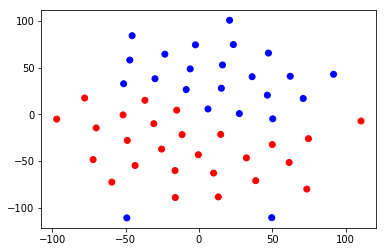

In [26]:
TSNE_plot("YO_full")

Cluster 0 : [2, 4, 6, 8, 9, 11, 12, 14, 17, 19, 20, 21, 22, 25, 26, 27, 36, 37, 39, 40, 41, 47, 49, 50, 52, 59]
Cluster 1 : [0, 1, 3, 5, 7, 10, 13, 15, 16, 18, 23, 24, 28, 29, 30, 31, 32, 33, 34, 35, 38, 42, 43, 44, 45, 46, 48, 51, 53, 54, 55, 56, 57, 58]


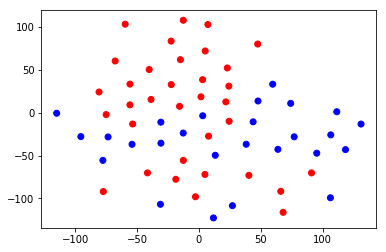

In [27]:
TSNE_plot("CA_full")

Cluster 0 : [1, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 21, 22, 23, 27, 29, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 50, 51, 52, 53, 54]
Cluster 1 : [0, 2, 3, 6, 14, 18, 20, 24, 25, 26, 28, 30, 31, 32, 33, 43, 45, 49, 55]


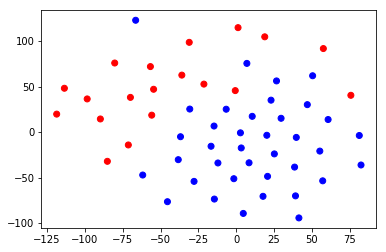

In [28]:
TSNE_plot("EMO_full")